In [1]:
# Import necessary libraries
import pandas as pd  # data manipulation and analysis
import numpy as np  # numerical operation and array handlings
import matplotlib.pyplot as plt  # data visualipytzation
import seaborn as sns  # statistical data visualization
from scipy import stats  # statistical analysis

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Load data from CSV file
df = pd.read_csv("data/health_lifestyle_classification.csv")

In [2]:
# Display first few rows of the dataframe to understand its structure and contents
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [3]:
# Returns numbers of rows and columns in the dataframe
df.shape 

(100000, 48)

In [4]:
# Returns information about the dataframe, including column names, data types, and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [5]:
# Returns summary statistics for numerical columns in the dataframe
df.describe().transpose()    

,count,mean,std,min,25%,50%,75%,max
survey_code,100000.0,50000.500000,28867.657797,1.000000,25000.750000,50000.500000,75000.250000,100000.000000
age,100000.0,48.525990,17.886768,18.000000,33.000000,48.000000,64.000000,79.000000
height,100000.0,170.023707,9.982798,140.000000,163.306615,170.016778,176.728920,210.000000
weight,100000.0,70.064862,14.693667,40.000000,59.856938,69.924141,80.027418,139.250894
bmi,100000.0,24.493876,5.951069,9.988495,20.271405,24.156734,28.258696,59.234792
bmi_estimated,100000.0,24.493876,5.951069,9.988495,20.271405,24.156734,28.258696,59.234792
bmi_scaled,100000.0,73.481627,17.853206,29.965484,60.814215,72.470201,84.776088,177.704377
bmi_corrected,100000.0,24.494140,5.954184,9.893845,20.271059,24.151699,28.247648,59.142646
waist_size,100000.0,84.933043,12.040314,34.093185,76.795185,84.957139,93.018713,133.153631
blood_pressure,92331.0,119.980149,15.015503,59.128168,109.812060,119.951794,130.120621,184.439195


In [6]:
# Drop irrelevant columns from the dataframe
# Removing:
# - survey_code: Identifier that doesn't contribute to analysis
# - bmi_estimated, bmi_scaled, bmi_corrected: Redundant BMI calculations
# - screen_time, device_usage: Not directly related to health outcomes
df = df.drop(columns=["survey_code", "bmi_estimated", "bmi_scaled", "bmi_corrected", "screen_time", "device_usage"])

In [7]:
# Display the remaining columns to verify the drop operation
df.columns


Index(['age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'stress_level', 'mental_health_score',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'income', 'diet_type', 'exercise_type', 'healthcare_access',
       'insurance', 'sunlight_exposure', 'meals_per_day', 'caffeine_intake',
       'family_history', 'pet_owner', 'electrolyte_level', 'gene_marker_flag',
       'environmental_risk_score', 'daily_supplement_dosage', 'target'],
      dtype='object')

In [8]:
# Check for duplicate values in each column
# Iterate through all columns to identify and count duplicates
for col in df.columns:
    # Count duplicated values in each column
    duplicated_count = df[col].duplicated().sum()
    print(f"Column: {col}")
    print(f"Number of duplicated values: {duplicated_count}")
    print("-" * 50)

Column: age
Number of duplicated values: 99938
--------------------------------------------------
Column: gender
Number of duplicated values: 99998
--------------------------------------------------
Column: height
Number of duplicated values: 157
--------------------------------------------------
Column: weight
Number of duplicated values: 2297
--------------------------------------------------
Column: bmi
Number of duplicated values: 4
--------------------------------------------------
Column: waist_size
Number of duplicated values: 0
--------------------------------------------------
Column: blood_pressure
Number of duplicated values: 7668
--------------------------------------------------
Column: heart_rate
Number of duplicated values: 14002
--------------------------------------------------
Column: cholesterol
Number of duplicated values: 0
--------------------------------------------------
Column: glucose
Number of duplicated values: 0
---------------------------------------------

In [9]:
# Check for rows with duplicate BMI values
# This helps identify if multiple people have the same BMI
duplicated_multi_cols = df[df.duplicated(subset=['bmi'],keep=False)]

In [10]:
# Display the number of rows with duplicate BMI values
duplicated_multi_cols.shape

(5, 42)

In [11]:
duplicated_multi_cols.sort_values('bmi')

# I didn't find any duplicate values for bmi as each data point represent an individual of different age
# As for other features, I think it is normal to have duplicates 

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
5654,68,Female,140.0,40.0,20.408163,84.483693,105.162371,82.930823,212.129612,74.617178,16.095002,6.714451,Fair,6.713497,4.368933,6659.941279,2026.043383,78.035624,Regularly,Light,1.968139,5,4,No,PhD,Labor,Artist,4869.203574,Vegetarian,NaN,Poor,No,High,3,High,No,No,0,1.0,5.5,-0.097804,healthy
28870,33,Female,140.0,40.0,20.408163,70.253045,135.606755,73.008299,159.707107,98.150324,20.810734,7.666744,Poor,10.980657,2.364476,6972.436658,2251.340692,34.918223,Regularly,Light,2.101251,7,0,Yes,Master,Unemployed,Driver,4519.835880,Keto,NaN,Moderate,No,Low,2,High,No,No,0,1.0,5.5,-0.796696,healthy
32396,53,Female,140.0,40.0,20.408163,81.169707,118.228672,90.260573,193.560620,109.385530,16.721103,5.327622,Good,10.563166,6.460802,11671.278689,2330.374325,60.282612,NaN,Non-smoker,1.028746,10,0,Yes,High School,Office,Artist,2474.586231,Vegan,Strength,Moderate,Yes,Low,2,Moderate,No,Yes,0,1.0,5.5,4.109114,healthy
34045,21,Female,140.0,40.0,20.408163,81.931318,117.360618,84.622143,155.998910,112.006537,19.378445,7.069675,Good,10.243811,1.895829,6942.189616,1924.402755,42.177539,Regularly,Light,3.271679,0,7,No,Master,Tech,Artist,932.074047,Vegan,Mixed,Poor,No,Low,2,NaN,No,Yes,0,1.0,5.5,-5.033648,healthy
53752,78,Male,140.0,40.0,20.408163,98.684049,127.871809,65.529510,196.274279,82.836935,13.244900,7.322900,Good,6.724999,5.879366,6918.969941,2087.160783,78.428044,NaN,Heavy,1.116539,10,7,No,PhD,Healthcare,Farmer,5126.775065,Omnivore,Strength,Good,No,Moderate,5,Moderate,No,Yes,0,1.0,5.5,-1.486255,healthy


In [12]:
# Handle irrelevant features/data
constant_features = [feature for feature in df.columns if df[feature].nunique() == 1]
print(f"constant features: {constant_features}")

constant features: ['electrolyte_level', 'gene_marker_flag', 'environmental_risk_score']


In [13]:
# Drop irrelevant features/data
no_df_constant_features = df.drop(columns=constant_features)
no_df_constant_features.shape

(100000, 39)

In [14]:
# Display first few rows of the dataframe after dropping the constant features
no_df_constant_features.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,NaN,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy


In [15]:
# Assign a new variable to the dataframe
df_new = no_df_constant_features

# Display rows of the new dataframe to check its new structure
df_new.head(20)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,NaN,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,NaN,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,NaN,Moderate,Yes,High,4,NaN,Yes,Yes,-8.985465,healthy
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,NaN,No,No,-6.296536,healthy
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,NaN,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,NaN,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,NaN,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,NaN,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,NaN,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy


In [16]:
# Analyze missing values in the dataset
# Set threshold for significant missing data (5%)
threshold = 5

# Print total number of records for context
print(f"Total Record: {df_new.shape[0]}")
print("-" * 20)

# Iterate through each column to check for missing values
for col in df_new.columns:
    # Count missing values in the column
    missing_count = df_new[col].isnull().sum()
    # Calculate percentage of missing values
    missing_ratio = df_new[col].isnull().sum() / df_new.shape[0] * 100

    # Only report columns with missing values above threshold
    if missing_ratio > threshold:
        print(f"Column: {col.title()} has {missing_count} missing values ({missing_ratio:.2f}%)")
        print("- " * 30)


Total Record: 100000
--------------------
Column: Blood_Pressure has 7669 missing values (7.67%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Heart_Rate has 14003 missing values (14.00%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Insulin has 15836 missing values (15.84%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Daily_Steps has 8329 missing values (8.33%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Alcohol_Consumption has 42387 missing values (42.39%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Income has 8470 missing values (8.47%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Exercise_Type has 24969 missing values (24.97%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Column: Caffeine_Intake has 33261 missing values (33.26%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [17]:
# Display numbers of rows and columns in the dataframe having missing data
df_missing = df_new[df_new.isnull().any(axis=1)]
df_missing.shape


(83870, 39)

In [18]:
# Display rows of the dataframe having missing data
df_missing.head(10)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,NaN,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,NaN,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,NaN,Moderate,Yes,High,4,NaN,Yes,Yes,-8.985465,healthy
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,NaN,No,No,-6.296536,healthy
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,NaN,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,NaN,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,NaN,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,NaN,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,NaN,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy
11,40,Female,181.985227,58.464076,17.652931,67.166741,92.056318,NaN,212.932870,96.270879,18.597565,8.007195,Fair,8.379459,4.690832,8677.901216,2196.617763,52.185858,NaN,Heavy,2.354002,2,7,Yes,High School,Tech,Engineer,6162.681873,Omnivore,Mixed,Poor,Yes,Moderate,1,NaN,Yes,No,-1.535834,healthy


In [19]:
# Identify numerical and categorical columns in the dataset
# This separation is important for applying appropriate analysis methods

# Get numerical features (columns with numeric data types)
numerical_features = df_new.select_dtypes(include=[np.number]).columns

# Get categorical features (columns with object or category data types)
categorical_features = df_new.select_dtypes(include=['object', 'category']).columns

# Display the results
print(f"numerical columns: {numerical_features}")
print("-" * 50)
print(f"categorical columns: {categorical_features}")

numerical columns: Index(['age', 'height', 'weight', 'bmi', 'waist_size', 'blood_pressure',
       'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours',
       'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake',
       'sugar_intake', 'water_intake', 'stress_level', 'mental_health_score',
       'income', 'meals_per_day', 'daily_supplement_dosage'],
      dtype='object')
--------------------------------------------------
categorical columns: Index(['gender', 'sleep_quality', 'alcohol_consumption', 'smoking_level',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'diet_type', 'exercise_type', 'healthcare_access', 'insurance',
       'sunlight_exposure', 'caffeine_intake', 'family_history', 'pet_owner',
       'target'],
      dtype='object')


In [20]:

# Get the list of missing values for categorical columns only
df_missing_categorical = df_missing[categorical_features].isnull().any()
df_missing_categorical = df_missing_categorical[df_missing_categorical].index
print(f"Categorical columns with missing values: {df_missing_categorical.tolist()}")
print("-" * 50)

Categorical columns with missing values: ['alcohol_consumption', 'exercise_type', 'caffeine_intake']
--------------------------------------------------


In [21]:
# Create a copy of the dataframe to preserve original data
df_filled = df_new.copy()

# Fill missing values in numerical columns with median values
# Using median instead of mean because it's less sensitive to outliers
df_filled_median = df_new.fillna(df_new.median(numeric_only=True))

# Display the first few rows to verify the changes
df_filled_median.head(10)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,NaN,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,14.983414,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,NaN,Moderate,Yes,High,4,NaN,Yes,Yes,-8.985465,healthy
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,NaN,No,No,-6.296536,healthy
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,NaN,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,14.983414,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,NaN,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,14.983414,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,NaN,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy


In [22]:
# Handle missing values in categorical columns
# Iterate through each categorical column
for col in categorical_features:
    # Fill missing values with mode (most frequent value)
    # Mode is used for categorical data as mean/median doesn't make sense for categories
    df_filled_median[col] = df_filled_median[col].fillna(df_filled[col].mode()[0])

# Display first few rows to verify the imputation
df_filled_median.head(10)

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,14.983414,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,Occasionally,Non-smoker,1.694262,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,14.983414,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Moderate,No,High,1,Moderate,No,Yes,8.388611,healthy
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,Occasionally,Heavy,1.968393,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,Strength,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy
5,25,Male,186.788025,55.276111,15.843073,86.591923,118.722971,51.971485,165.659179,99.496769,14.983414,10.065352,Poor,8.536500,3.581308,9221.120390,2565.731983,71.999679,Occasionally,Heavy,2.115213,7,6,No,High School,Office,Teacher,3667.151536,Vegetarian,Strength,Moderate,Yes,High,4,Moderate,Yes,Yes,-8.985465,healthy
6,78,Female,166.164733,65.035212,23.554335,67.838374,102.141757,70.472631,245.801110,91.821000,15.583876,4.342973,Excellent,6.206772,0.294640,7968.302176,1868.203785,53.836960,Occasionally,Heavy,1.704180,7,1,Yes,Bachelor,Unemployed,Engineer,3898.829196,Vegetarian,Strength,Poor,Yes,High,2,Moderate,No,No,-6.296536,healthy
7,38,Female,163.783995,47.756125,17.802712,73.071574,136.790243,65.791315,157.519344,106.466414,12.736925,6.659164,Poor,9.181722,1.783920,3606.509508,1885.142923,73.716032,Occasionally,Non-smoker,1.575306,7,2,No,Bachelor,Tech,Farmer,3360.848318,Omnivore,Strength,Moderate,Yes,Low,3,Moderate,No,Yes,7.875266,healthy
8,56,Female,165.716460,47.257109,17.208216,46.675208,133.536300,78.205237,160.148783,78.770043,14.983414,8.717906,Poor,11.461929,0.838778,5199.027338,1642.194189,84.438878,Occasionally,Light,2.337446,2,9,Yes,PhD,Office,Engineer,5366.332772,Vegan,Strength,Moderate,Yes,High,2,Moderate,No,No,-8.055654,healthy
9,75,Male,151.310888,65.966591,28.812682,94.294368,121.761602,90.470232,192.111798,130.681356,14.983414,8.184905,Fair,4.638267,2.341377,7436.828641,2508.233129,58.937603,Occasionally,Non-smoker,3.118364,10,9,No,Bachelor,Labor,Driver,4472.934549,Omnivore,Strength,Moderate,No,High,1,High,Yes,No,-3.035162,healthy


In [23]:
# Define function to find outliers using the Interquartile Range (IQR) method
def find_outliers_IQR_method(input_df, variable):
    """
    Identifies outliers in a dataset using the IQR method.
    
    Parameters:
    input_df (pandas.DataFrame): Input DataFrame containing the data
    variable (str): Name of the column to check for outliers
    
    Returns:
    tuple: (lower_bound, upper_bound) defining the range of non-outlier values
    
    Method:
    - Calculate Q1 (25th percentile) and Q3 (75th percentile)
    - Calculate IQR = Q3 - Q1
    - Define bounds as Q1 - 1.5*IQR and Q3 + 1.5*IQR
    """

    # Calculate quartiles and IQR
    q1 = input_df[variable].quantile(0.25) # First quartile (25th percentile)
    q3 = input_df[variable].quantile(0.75) # Third quartile (75th percentile)
    IQR = q3 - q1 # Interquartile range
    
    # Calculate bounds
    lower_bound = q1 - 1.5 * IQR # Lower bound for non-outliers
    upper_bound = q3 + 1.5 * IQR # Upper bound for non-outliers
    return lower_bound, upper_bound

In [24]:
feature = "blood_pressure"
lower_bound, upper_bound = find_outliers_IQR_method(df, feature)
lower_bound, upper_bound

(np.float64(79.34921954953275), np.float64(160.58346121371534))

In [25]:
# Remove outliers with respect to Feature
# df_cleaned = df[(df[feature] > lower_bound) & (df[feature] < upper_bound)]
# print(f"Cleaned dataset: {df_cleaned.shape}") 
# print(f"Outliers count: {df_new.shape[0] - df_cleaned.shape[0]}")
# print("-" * 50)

df_cleaned = df_filled_median[(df_filled_median[feature] > lower_bound) & (df_filled_median[feature] < upper_bound)]
print(f"Cleaned dataset: {df_cleaned.shape}") 
print(f"Outliers count: {df_new.shape[0] - df_cleaned.shape[0]}")
print("-" * 50)

Cleaned dataset: (99409, 39)
Outliers count: 591
--------------------------------------------------


In [26]:
# Create a smaller sample of the dataset for exploratory analysis
# Using 5% of the data to make visualization and analysis more manageable
# Setting random_state for reproducibility
df_ = df_cleaned.sample(frac=0.05, random_state=42)

# Generate summary statistics for the sampled dataset
# transpose() is used to make the output more readable
df_.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4970.0,48.361368,17.845082,18.000000,33.000000,48.000000,64.000000,79.000000
height,4970.0,170.014713,10.160491,140.000000,163.278070,170.054617,176.778272,207.720265
weight,4970.0,70.095517,14.595139,40.000000,60.212525,69.746101,80.088795,124.737867
bmi,4970.0,24.511672,5.931188,10.528711,20.279277,24.119719,28.292546,50.197972
waist_size,4970.0,84.904291,11.999590,43.361093,76.978692,84.885860,93.039384,132.533999
blood_pressure,4970.0,120.217238,14.066440,79.552944,111.297165,119.951794,129.389114,160.532808
heart_rate,4970.0,74.911929,9.343791,40.474126,69.237827,75.046211,80.497555,113.089875
cholesterol,4970.0,189.986733,30.194187,83.700253,169.068529,190.003921,210.828415,319.875613
glucose,4970.0,100.016721,19.970868,20.795828,86.351200,99.872234,113.259914,181.206132
insulin,4970.0,15.013113,4.559390,-2.267647,12.290367,14.983414,17.702328,32.274845


Text(0.5, 1.0, 'After outlier removal: blood_pressure')

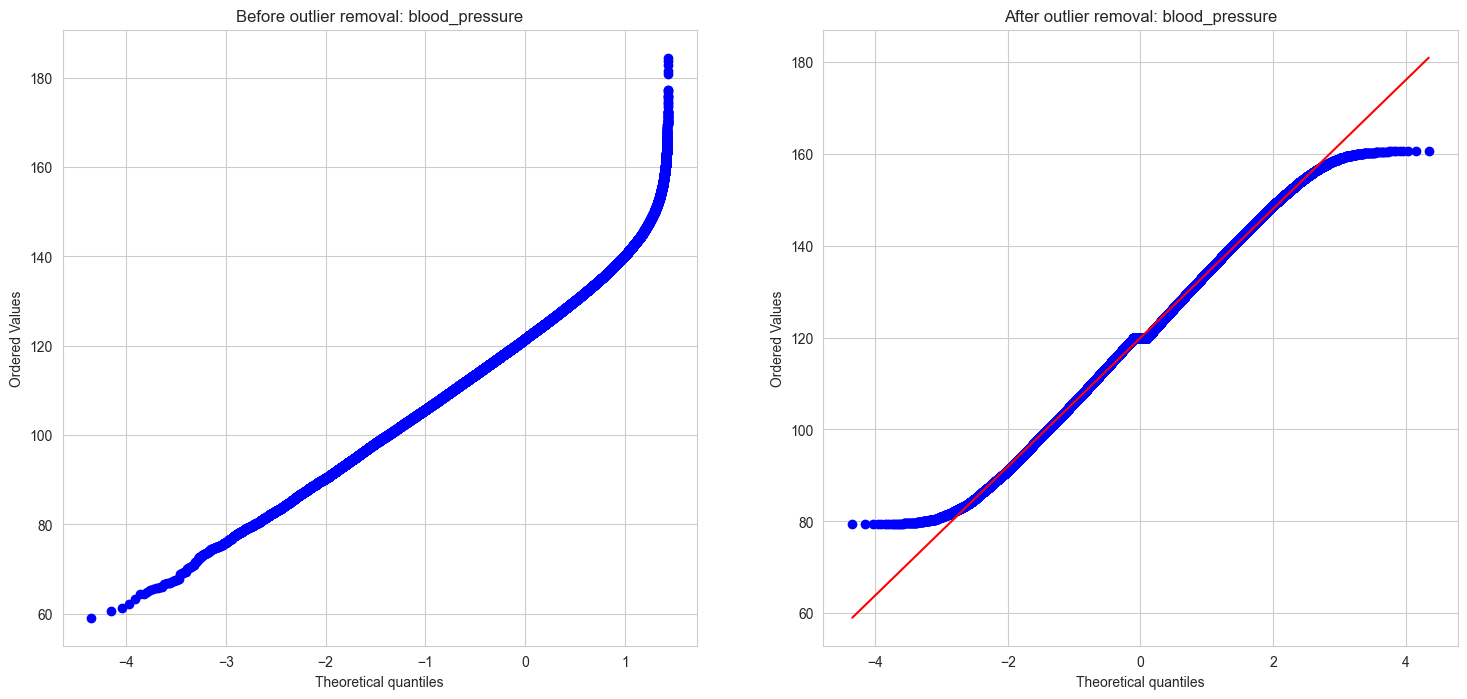

In [27]:
# Probability plot before and after cleaned data
# A probplot is used to determine if the data is normally distributed and identify outliers.

sns.set_style("whitegrid")
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
stats.probplot(df[feature], plot=plt)
plt.title(f"Before outlier removal: {feature}")

plt.subplot(1, 2, 2)
stats.probplot(df_cleaned[feature], plot=plt)
plt.title(f"After outlier removal: {feature}")


Left plot (Before outlier removal): Blood pressure values is far from the red reference line, especially at the high end (right tail).

Right plot (After outlier removal): The data aligns much closer to the diagonal line, meaning the cleaned data follows the normal distribution more closely.

Before cleaning, the distribution was positively skewed (long right tail).
After removing outliers, skewness decreases, giving a more symmetric spread around the mean.

## Exploratory Data Analysis after data cleaning

In [28]:
# Check target column
df_["target"].value_counts()

target
healthy     3450
diseased    1520
Name: count, dtype: int64

/var/folders/h_/4ghgx3wx635bd3k0fy4w48cc0000gn/T/ipykernel_2504/1073791036.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="bmi", data=df_, palette="Set2")


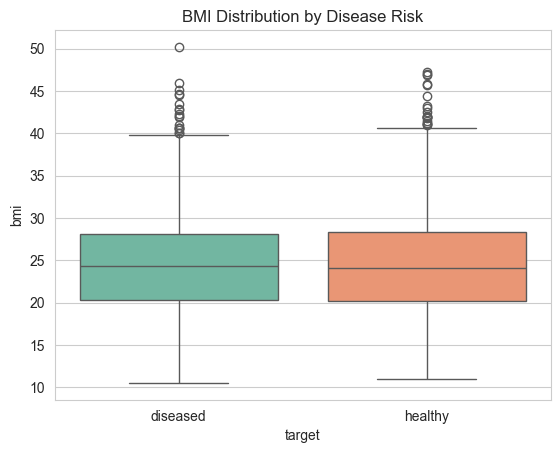

In [29]:
sns.boxplot(x="target", y="bmi", data=df_, palette="Set2")
plt.title("BMI Distribution by Disease Risk")
plt.show()

Diseased individuals and healthy individuals both have similar BMI, using boxplot it shows that bmi is not a risk factor.

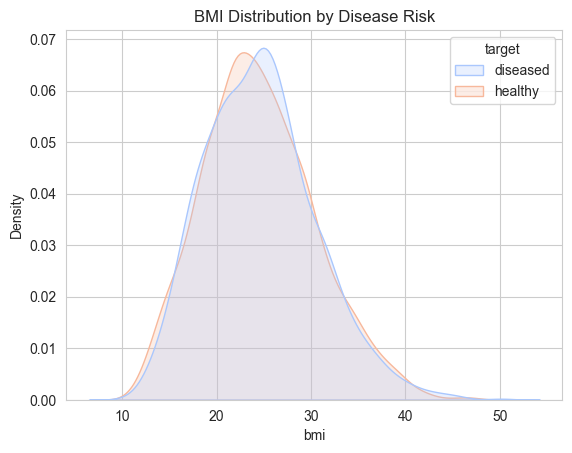

In [30]:
sns.kdeplot(data=df_, x="bmi", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("BMI Distribution by Disease Risk")
plt.show()

The density curves indicate that individuals with higher disease risk are more likely to have higher BMI values. 

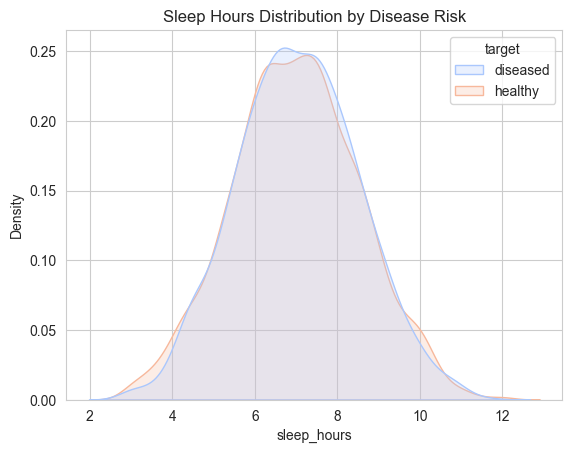

In [35]:
sns.kdeplot(data=df_, x="sleep_hours", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Sleep Hours Distribution by Disease Risk")
plt.show()

The extensive overlap suggests sleep duration alone is not a strong predictor.

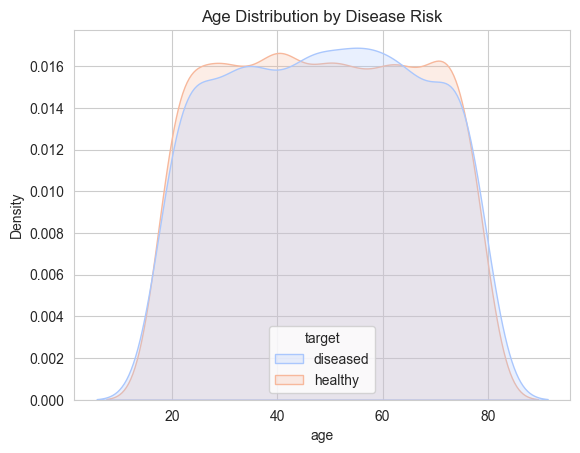

In [32]:
sns.kdeplot(data=df_, x="age", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Age Distribution by Disease Risk")
plt.show()

Age between 45-65 have higher disease risk.

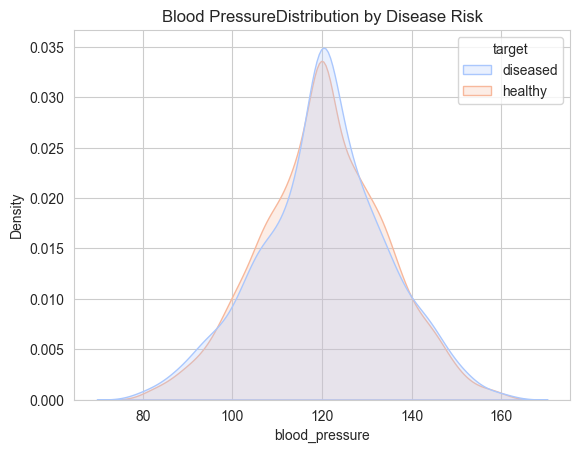

In [33]:
sns.kdeplot(data=df_, x="blood_pressure", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Blood PressureDistribution by Disease Risk")
plt.show()

High disease risk groups show a distribution skewed towards higher blood pressure values. This supports the known relationship between elevated blood pressure and increased disease risk.

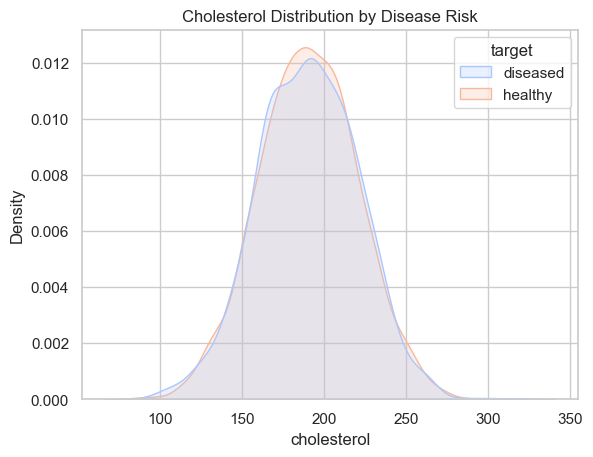

In [44]:

sns.kdeplot(data=df_, x="cholesterol", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Cholesterol Distribution by Disease Risk")
plt.show()

Cholesterol appears to be a poor predictor of disease risk in this dataset. While cholesterol is an established risk factor in large population studies, this dataset shows individual-level prediction is complex.

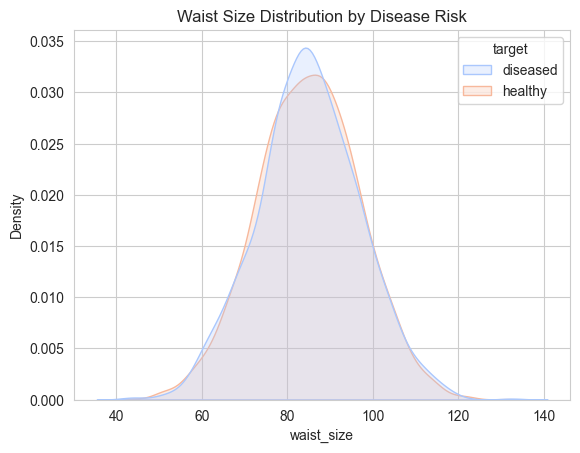

In [42]:
sns.kdeplot(data=df_, x="waist_size", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Waist Size Distribution by Disease Risk")
plt.show()

This distribution suggests that waist size is the most promising single predictor among the variables analyzed so far, showing meaningful differences between healthy and diseased populations.

Diseased Group has a higher density for 80-90cm (assuming centimetres) waist size. Waist circumference may be a better predictor of health risks than BMI due to easier to measure and more directly related to visceral fats.